In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Downloads/heart.csv')

In [4]:
df.head()
import matplotlib.pyplot as plt

In [7]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [9]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


<Axes: ylabel='Frequency'>

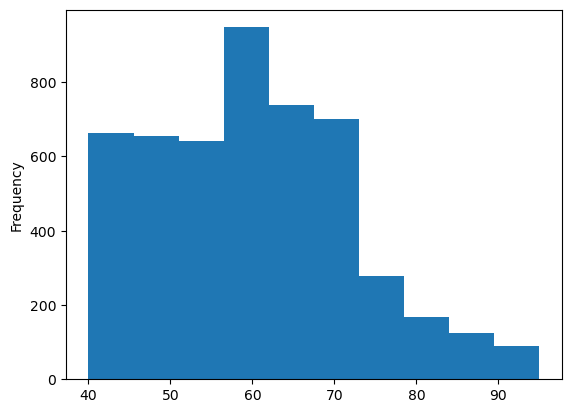

In [11]:
df['age'].plot(kind='hist')

In [14]:
q1,q3=df['age'].quantile([0.25,0.75])
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
indices=df[(df['age']<lower_bound) | (df['age']>upper_bound)].index

In [20]:
outliers=df.iloc[indices]

In [24]:
x=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [36]:
ct=DecisionTreeClassifier(random_state=40)

In [37]:
model=ct.fit(x_train,y_train)

In [38]:
y_pred=model.predict(x_test)

In [39]:
accuracy=accuracy_score(y_test,y_pred)

In [40]:
accuracy

0.9806666666666667

In [41]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[1026,   14],
       [  15,  445]], dtype=int64)

In [42]:
class_report=classification_report(y_test,y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      1040\n           1       0.97      0.97      0.97       460\n\n    accuracy                           0.98      1500\n   macro avg       0.98      0.98      0.98      1500\nweighted avg       0.98      0.98      0.98      1500\n'

In [44]:
from sklearn import tree

In [46]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

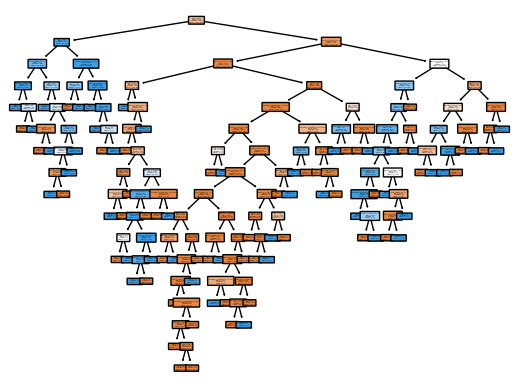

In [49]:
tree.plot_tree(ct,filled=True,feature_names=x.columns.to_list(),class_names=['No Event','Death_Event'],rounded=True)
plt.show()